In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('seaborn-colorblind')
sns.set_style('darkgrid')

In [2]:
# Read pandas dataframe from the csv we created
#df = pd.read_csv("/home/ugdg/workspace/repetitivity_deepseq/repetitive_pertype.tsv", sep = "\t", index_col="samples")
df = pd.read_csv("/home/ugdg/workspace/repetitivity_deepseq/repetitive_pertype.tsv", sep = "\t", index_col="samples")

In [3]:
df_transposed = df.T.reset_index()

In [4]:
df_transposed.head()

samples,index,2122,2123,2124,2125,2126,2127,2128,2129,2130,...,2145,2146,2147,2148,2149,2150,2151,2152,2153,2154
0,DNA,12380,16075,15010,14817,15834,19505,15405,13751,13446,...,16005,13990,13610,12287,15912,15833,16526,14743,14680,15517
1,DNA/hAT,19159,21927,22909,22293,22309,25169,21721,20692,20677,...,24023,20577,20166,19238,22554,23476,23981,20684,21830,21884
2,DNA/hAT-Ac,8982,12072,10706,10635,11823,14907,10854,9676,9189,...,10836,9500,9364,8705,11248,10771,11078,10014,9885,10588
3,DNA/hAT-Blackjack,26660,42735,28876,30242,40059,57419,36076,27687,26516,...,29713,27628,27364,22793,36285,31710,30294,29161,26637,32360
4,DNA/hAT-Charlie,810950,824784,929570,976597,924827,943740,889986,861577,834322,...,998614,844087,855232,807119,925130,994720,933450,867106,896484,895993


In [5]:
lgroups = df_transposed["index"].tolist()
groups = []
for el in lgroups:
    groups.append(el.split("/")[0])

In [6]:
se = pd.Series(groups)

df_transposed["grouped"] = se.values
df_transposed.head()

samples,index,2122,2123,2124,2125,2126,2127,2128,2129,2130,...,2146,2147,2148,2149,2150,2151,2152,2153,2154,grouped
0,DNA,12380,16075,15010,14817,15834,19505,15405,13751,13446,...,13990,13610,12287,15912,15833,16526,14743,14680,15517,DNA
1,DNA/hAT,19159,21927,22909,22293,22309,25169,21721,20692,20677,...,20577,20166,19238,22554,23476,23981,20684,21830,21884,DNA
2,DNA/hAT-Ac,8982,12072,10706,10635,11823,14907,10854,9676,9189,...,9500,9364,8705,11248,10771,11078,10014,9885,10588,DNA
3,DNA/hAT-Blackjack,26660,42735,28876,30242,40059,57419,36076,27687,26516,...,27628,27364,22793,36285,31710,30294,29161,26637,32360,DNA
4,DNA/hAT-Charlie,810950,824784,929570,976597,924827,943740,889986,861577,834322,...,844087,855232,807119,925130,994720,933450,867106,896484,895993,DNA


In [7]:
newdf = df_transposed.groupby(["grouped"]).sum()

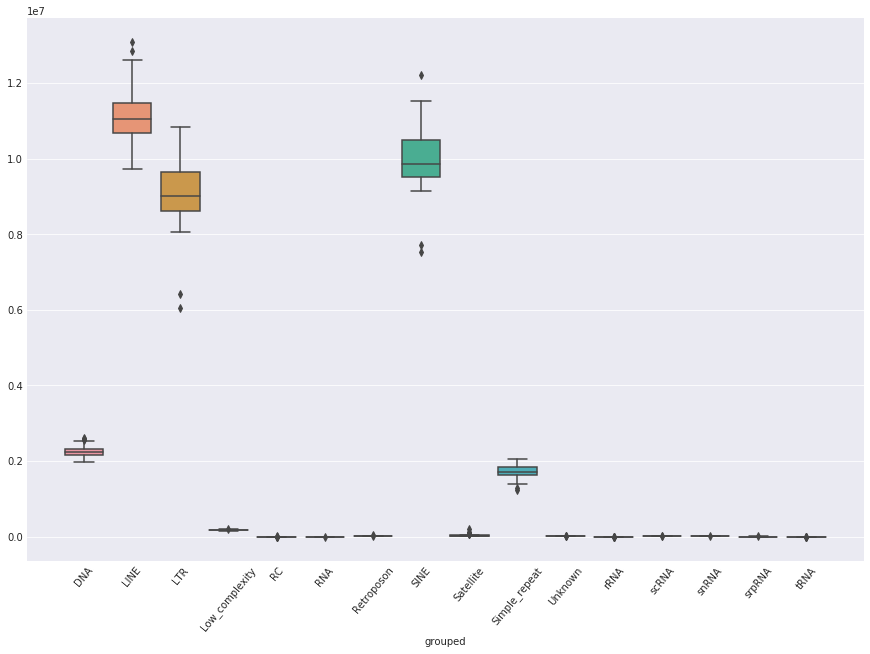

In [8]:
plt.figure(figsize=(15, 10))

sns.boxplot(data=newdf.T)
plt.xticks(rotation=50)
plt.autoscale()
plt.show()

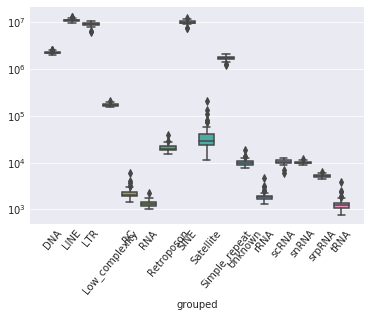

In [9]:
fig, ax = plt.subplots()
ax.set(yscale="log")

sns.boxplot(data=newdf.T)
plt.xticks(rotation=50)
plt.autoscale()
plt.show()

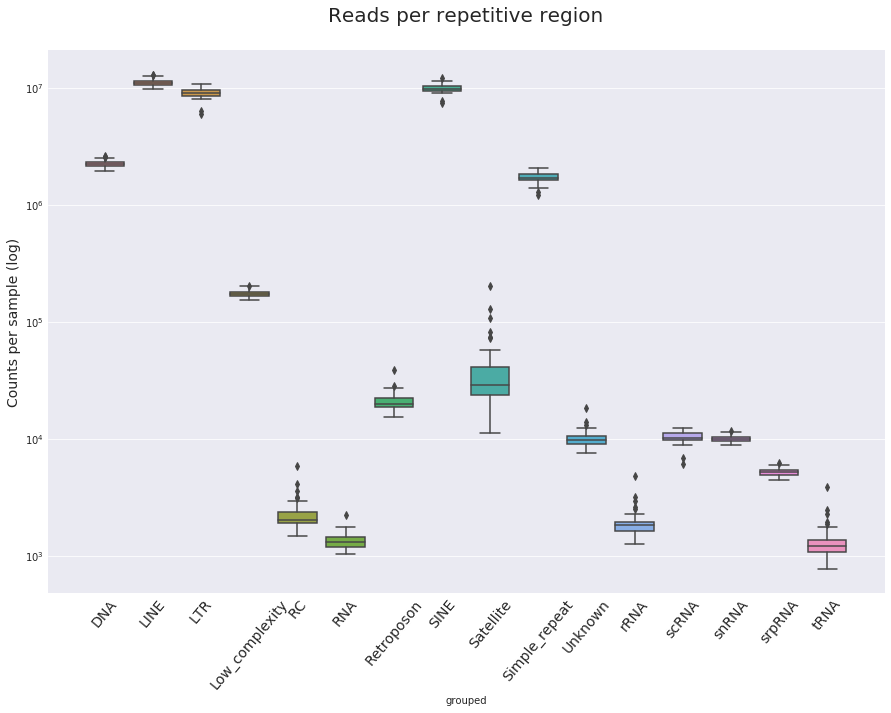

In [11]:
fig, ax = plt.subplots(figsize = (15, 10))
ax.set(yscale="log")
ax.set_ylabel('Counts per sample (log)', fontsize=14)
ax.set_xlabel(" ")
plt.title("Reads per repetitive region\n", fontsize=20)
sns.boxplot(data=newdf.T)
plt.xticks(rotation=50, fontsize=14)
plt.autoscale()
plt.show()
fig.savefig("logplot.png")

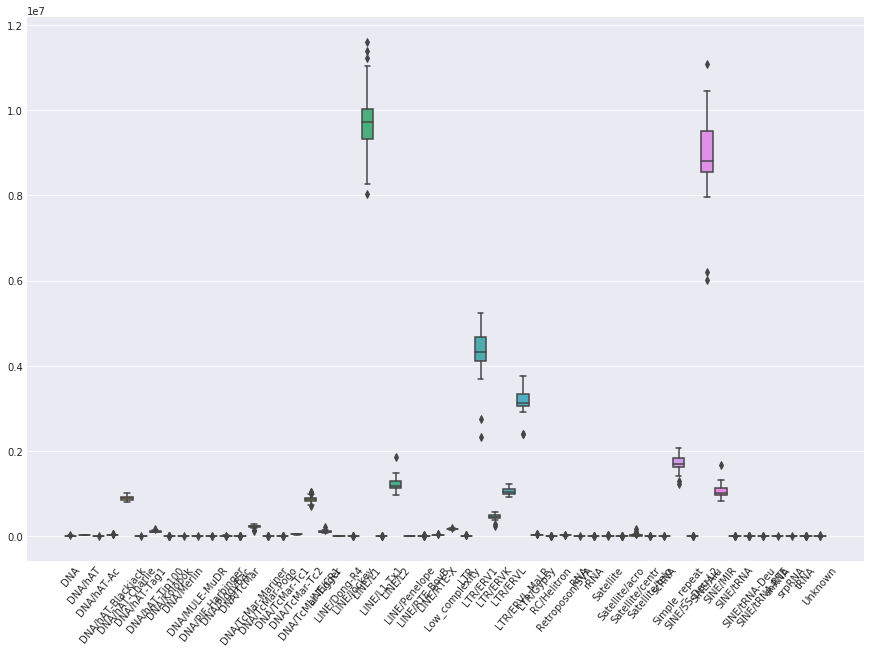

In [8]:
plt.figure(figsize=(15, 10))

sns.boxplot(data=df)
plt.xticks(rotation=50)
plt.autoscale()
plt.show()